Import

In [1]:
import subprocess
import shlex
import os.path
import sys
import pickle
import datetime
import tweepy
import matplotlib.pyplot as plt 
import numpy as np
from scipy import spatial  
from sklearn.metrics import r2_score
import string
import numpy as np
import matplotlib.pyplot as plt
import collections
from itertools import tee, islice
from sklearn.decomposition import PCA
import math

Other Helper Functions

In [2]:
def get_list_of_users(tweets):

    list_of_user = []

    for tweet in tweets:
        user_id = tweet.user.id
        if user_id not in list_of_user:
            list_of_user.append(user_id)

    return list_of_user

Import Tweet and Related Data

In [ ]:
# Where you want to save the coverted files # TO BE REMOVED
test_directory = "" 

In [3]:
#Location of all the ".p" files containing tweets of friends
directory = "L:/Users/Daniel/Documents/2020-2021/2021 Winter Courses/COG403/Assignments/Project/Python Tweets/" 

# Location of sentiment analysis file
sentiment_directory = "L:/Users/Daniel/Documents/2020-2021/2021 Winter Courses/COG403/Assignments/Project/Python Tweets/Sentiment/"
analyzed_users = "L:/Users/Daniel/Documents/2020-2021/2021 Winter Courses/COG403/Assignments/Project/Python Tweets/data_analyzed_1.p"

In [4]:
# Tweets output from the function, get_inital_tweets
initial_tweet_file = directory + 'user_tweet_large.p'
initial_tweets = pickle.load(open(initial_tweet_file, "rb"))
trending_tweet_file = directory + 'trending_tweets.p'
trending_tweets = pickle.load(open(trending_tweet_file, "rb"))

In [5]:
print(len(trending_tweets))
list_of_users = get_list_of_users(trending_tweets)

740


In [3]:
# Don't use this if using above
already_analyzed = pickle.load(open(analyzed_users, "rb"))
list_of_users = []

for uid in already_analyzed:
    list_of_users.append(uid)

Regression Models - Simple

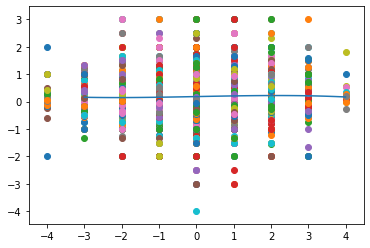

In [6]:
# Plot relationship between tweet sentiment and environment sentiment
    
x_array = []
y_array = []

# Analyze all the  users in initial_tweets, for every tweet, plot the tweet sentiment and the average
# environment sentiment (one value for all post by friends)
for user in list_of_users:
    
    file_name = sentiment_directory + str(user) + '_avg.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:
            if 'friend' in tweet_sentiment[tweet_id]:
                x_array.append(tweet_sentiment[tweet_id]['combined'])
                y_array.append(tweet_sentiment[tweet_id]['friend'])
                plt.scatter(tweet_sentiment[tweet_id]['combined'], tweet_sentiment[tweet_id]['friend'])
            
# Line of best fit
mymodel = np.poly1d(np.polyfit(x_array, y_array, 3))
myline = np.linspace(-3, 4, 100)
plt.plot(myline, mymodel(myline))

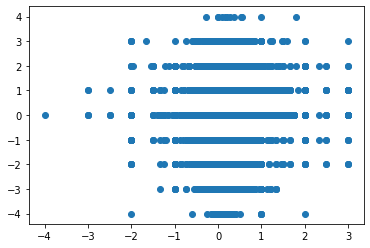

In [14]:
# Tweet Sentiment from Environment
plt.scatter(y_array, x_array)

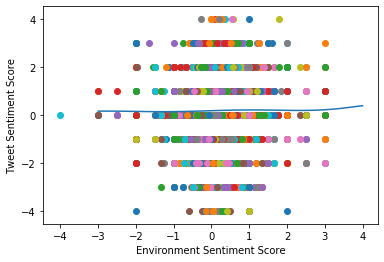

In [7]:
# Analyze all the  users in initial_tweets, for every tweet, plot the tweet sentiment and the average
# environment sentiment (one value for all post by friends)
for user in list_of_users:
    
    file_name = sentiment_directory + str(user) + '_avg.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:
            if 'friend' in tweet_sentiment[tweet_id]:
                plt.scatter(tweet_sentiment[tweet_id]['friend'], tweet_sentiment[tweet_id]['combined'])
            
# Line of best fit - 7 degree
mymodel = np.poly1d(np.polyfit(x_array, y_array, 7))
myline = np.linspace(-3, 4, 100)
plt.xlabel("Environment Sentiment Score")
plt.ylabel("Tweet Sentiment Score")
plt.plot(myline, mymodel(myline))

In [8]:
# Convert into numpy array
x_array = np.array(x_array)
y_array = np.array(y_array)

0.0019823011039523664


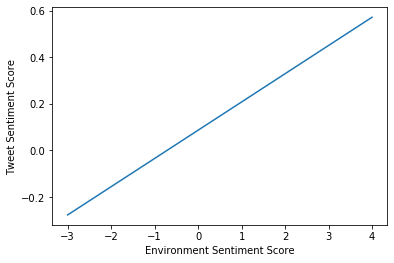

In [9]:
# Linear Model

mymodel = np.poly1d(np.polyfit(y_array, x_array, 1))
myline = np.linspace(-3, 4, 100)
plt.xlabel("Environment Sentiment Score")
plt.ylabel("Tweet Sentiment Score")
plt.plot(myline, mymodel(myline))

# r^2 score for linear model
print(r2_score(x_array, mymodel(y_array)))

0.0019824945197901567


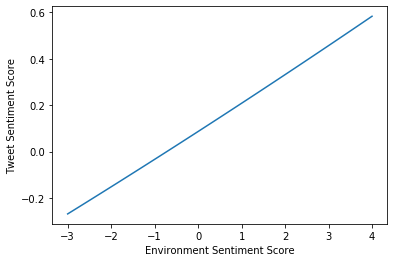

In [10]:
# Polynomial - Degree 2

mymodel_2 = np.poly1d(np.polyfit(y_array, x_array, 2))
plt.xlabel("Environment Sentiment Score")
plt.ylabel("Tweet Sentiment Score")
plt.plot(myline, mymodel_2(myline))

# r^2 score for linear model
print(r2_score(x_array, mymodel_2(y_array)))

0.002764008351138436


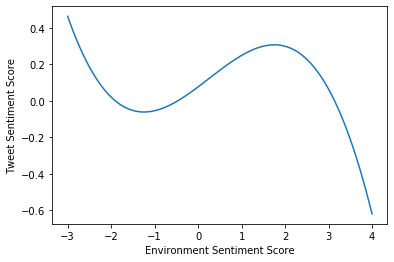

In [11]:
# Polynomial - Degree 3

mymodel_3 = np.poly1d(np.polyfit(y_array, x_array, 3))
plt.xlabel("Environment Sentiment Score")
plt.ylabel("Tweet Sentiment Score")
plt.plot(myline, mymodel_3(myline))

# r^2 score for linear model
print(r2_score(x_array, mymodel_3(y_array)))

0.0027839864976439976


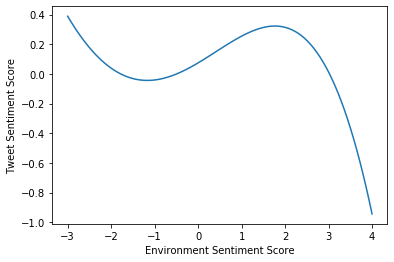

In [12]:
# Polynomial - Degree 4

mymodel_4 = np.poly1d(np.polyfit(y_array, x_array, 4))
plt.xlabel("Environment Sentiment Score")
plt.ylabel("Tweet Sentiment Score")
plt.plot(myline, mymodel_4(myline))

# r^2 score for linear model
print(r2_score(x_array, mymodel_4(y_array)))

0.0030478226761996297


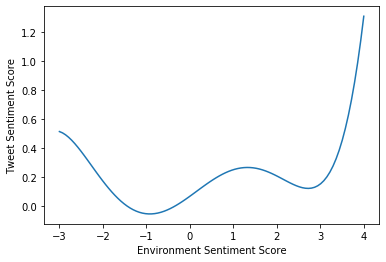

In [13]:
# Polynomial - Degree 5

mymodel_5 = np.poly1d(np.polyfit(y_array, x_array, 5))
plt.xlabel("Environment Sentiment Score")
plt.ylabel("Tweet Sentiment Score")
plt.plot(myline, mymodel_5(myline))

# r^2 score for linear model
print(r2_score(x_array, mymodel_5(y_array)))

0.0030531785896230623


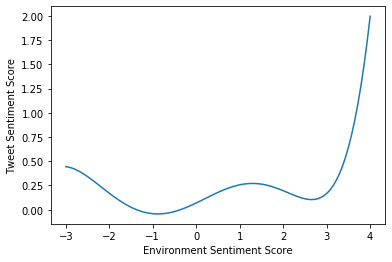

In [14]:
# Polynomial - Degree 6

mymodel_6 = np.poly1d(np.polyfit(y_array, x_array, 6))
plt.xlabel("Environment Sentiment Score")
plt.ylabel("Tweet Sentiment Score")
plt.plot(myline, mymodel_6(myline))

# r^2 score for linear model
print(r2_score(x_array, mymodel_6(y_array)))

0.0031231369907090967


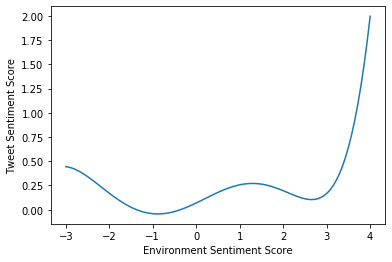

In [15]:
# Polynomial - Degree 7

mymodel_7 = np.poly1d(np.polyfit(y_array, x_array, 7))
plt.xlabel("Environment Sentiment Score")
plt.ylabel("Tweet Sentiment Score")
plt.plot(myline, mymodel_6(myline))

# r^2 score for linear model
print(r2_score(x_array, mymodel_7(y_array)))

Predictive Accuracy - Predicting Type of Tweets

In [16]:
# Prep for Testing Model
result = {}

NZ_tweet_dir = "L:/Users/Daniel/Documents/2020-2021/2021 Winter Courses/COG403/Assignments/Project/Partner Code/"
predictive_model = "L:/Users/Daniel/Documents/2020-2021/2021 Winter Courses/COG403/Assignments/Project/Partner Code/Sentiment/"

#tweet_file_name = predictive_model  + 'user_tweet_large_NZ_1.p'
#predictive_user_tweets = pickle.load(open(tweet_file_name, "rb"))

trending_tweet_file_NZ = NZ_tweet_dir + 'trending_tweets_NZ.p'
trending_tweets_NZ = pickle.load(open(trending_tweet_file_NZ, "rb"))

list_of_users_NZ = get_list_of_users(trending_tweets_NZ)

analyzed_users_NZ = predictive_model  + 'data_analyzed_1.p'
already_analyzed_NZ = pickle.load(open(analyzed_users_NZ, "rb"))

for uid in already_analyzed_NZ:
    if uid not in list_of_users_NZ:
        list_of_users_NZ.append(uid)
        
#print(len(list_of_users_NZ))

In [28]:
accurate = 0
total = 0

for user in list_of_users_NZ:
    
    file_name = predictive_model + str(user) + '_avg.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:
            if 'friend' in tweet_sentiment[tweet_id]:
                total += 1
                tweet_sent = tweet_sentiment[tweet_id]['combined']
                friend_sent = tweet_sentiment[tweet_id]['friend']
                
                prediction = math.ceil(mymodel_7(friend_sent))
                
                if prediction == tweet_sent:
                    accurate += 1
        

In [29]:
print(accurate/total)

0.2430286599535244


In [118]:
# Predict type of tweet
total_count = 0
accurate = 0

p_total = 0
p_acc = 0

n_total = 0
n_acc = 0

ne_total = 0
ne_acc = 0

pos_total = 0
neg_total = 0
neu_total = 0

p_miss = 0
n_miss = 0
ne_miss = 0

for user in list_of_users_NZ:
    
    file_name = predictive_model + str(user) + '_avg.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:
            if 'friend' in tweet_sentiment[tweet_id]:
                
                tweet_sent = tweet_sentiment[tweet_id]['combined']
                friend_sent = tweet_sentiment[tweet_id]['friend']
                
                if tweet_sent != 0:
                    total_count += 1
                
                    prediction = mymodel_7(friend_sent)
                    # Base val is the value when sentiment is 0, as predicted by the model
                    base_val = mymodel_7(0)
                    
                    if prediction < base_val:
                        prediction = -1
                    else:
                        prediction = 1

                    if tweet_sent > 0:
                        p_total += 1
                        
                        if prediction > 0:
                            accurate += 1
                            pos_total += 1
                            p_acc += 1
                        elif prediction < 0:
                            neg_total += 1
                            p_miss += 1
                            
                    elif tweet_sent < 0:
                        
                        n_total += 1
                        if prediction < 0:
                            accurate += 1
                            neg_total+= 1
                            n_acc += 1
                        elif prediction > 0:
                            pos_total+= 1
                            n_miss += 1

In [119]:
print(accurate/total_count)
print("Total Post " + str(total_count))
print("Positive Post " + str(p_total))
print("Negative Post " + str(n_total))
print("Positive Accurate Predict "+ str(p_acc))
print("Negative Accurate Predict "+ str(n_acc))
print("# of positive prediction " + str(pos_total))
print("# of negative prediction " + str(neg_total))
print("# of positive miss " + str(p_miss))
print("# of negative miss " + str(n_miss))

0.5869817900038745
Total Post 2581
Positive Post 1550
Negative Post 1031
Positive Accurate Predict 1161
Negative Accurate Predict 354
# of positive prediction 1838
# of negative prediction 743
# of positive miss 389
# of negative miss 677


In [88]:
# Filter neutral tweets and predict positive from negative
total_count = 0
accurate = 0

p_total = 0
p_acc = 0

n_total = 0
n_acc = 0

ne_total = 0
ne_acc = 0

pos_total = 0
neg_total = 0
neu_total = 0

p_miss = 0
n_miss = 0
ne_miss = 0

for user in list_of_users_NZ:
    
    file_name = predictive_model + str(user) + '_avg.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:
            if 'friend' in tweet_sentiment[tweet_id]:
                
                tweet_sent = tweet_sentiment[tweet_id]['combined']
                friend_sent = tweet_sentiment[tweet_id]['friend']
                
                if tweet_sent != 0:
                    total_count += 1
                
                    prediction = mymodel(friend_sent)
                    # Base val is the value when sentiment is 0, as predicted by the model
                    base_val = mymodel(0)
                    
                    if -1 < prediction < base_val:
                        prediction = -1
                    elif prediction <= -1:
                        prediction = math.floor(mymodel(friend_sent))
                    else:
                        prediction = math.ceil(mymodel(friend_sent))

                    if tweet_sent > 0:
                        p_total += 1
                        
                        if prediction > 0:
                            accurate += 1
                            pos_total += 1
                            p_acc += 1
                        elif prediction < 0:
                            neg_total += 1
                            p_miss += 1
                            
                    elif tweet_sent < 0:
                        
                        n_total += 1
                        if prediction < 0:
                            accurate += 1
                            neg_total+= 1
                            n_acc += 1
                        elif prediction > 0:
                            pos_total+= 1
                            n_miss += 1

In [89]:
print(accurate/total_count)
print("Total Post " + str(total_count))
print("Positive Post " + str(p_total))
print("Negative Post " + str(n_total))
print("Positive Accurate Predict "+ str(p_acc))
print("Negative Accurate Predict "+ str(n_acc))
print("# of positive prediction " + str(pos_total))
print("# of negative prediction " + str(neg_total))
print("# of positive miss " + str(p_miss))
print("# of negative miss " + str(n_miss))

0.5869817900038745
Total Post 2581
Positive Post 1550
Negative Post 1031
Positive Accurate Predict 1161
Negative Accurate Predict 354
# of positive prediction 1838
# of negative prediction 743
# of positive miss 389
# of negative miss 677


Sentiment Score Prediction

In [116]:
# Predict all, excluding neutral tweets
total_count = 0
accurate = 0

p_total = 0
p_acc = 0

n_total = 0
n_acc = 0

ne_total = 0
ne_acc = 0

pos_total = 0
neg_total = 0
neu_total = 0

p_miss = 0
n_miss = 0
ne_miss = 0

# Base val is the value when sentiment is 0, 1, 2, 3, as predicted by model
base_val = []
                    
for i in range(-4, 5):
    base_val.append(mymodel(i))
    print(mymodel(i))

for user in list_of_users_NZ:
    
    file_name = predictive_model + str(user) + '_avg.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:
            if 'friend' in tweet_sentiment[tweet_id]:
                
                tweet_sent = tweet_sentiment[tweet_id]['combined']
                friend_sent = tweet_sentiment[tweet_id]['friend']
                
                if tweet_sent != 0:
                    total_count += 1
                
                    prediction = mymodel(friend_sent)
                    
                    if base_val[0] <= prediction < base_val[1]:
                        prediction = -4
                    elif base_val[1] <= prediction < base_val[2]:
                        prediction = -3
                    elif base_val[2] <= prediction < base_val[3]:
                        prediction = -2
                    elif base_val[3] <= prediction < base_val[4]:
                        prediction = -1
                    elif base_val[4] <= prediction < base_val[5]:
                        prediction = 0
                    elif base_val[5] <= prediction < base_val[6]:
                        prediction = 1
                    elif base_val[6] <= prediction < base_val[7]:
                        prediction = 2
                    elif base_val[7]<= prediction < base_val[8]:
                        prediction = 3
                    else:
                        prediction = 4

                    #rint (prediction, tweet_sent)
                    
                    if tweet_sent > 0:
                        p_total += 1
                        
                        if prediction == tweet_sent:
                            accurate += 1
                            pos_total += 1
                            p_acc += 1
                        elif prediction < 0:
                            neg_total += 1
                            p_miss += 1
                            
                    elif tweet_sent < 0:
                        
                        n_total += 1
                        if prediction == tweet_sent:
                            accurate += 1
                            neg_total+= 1
                            n_acc += 1
                        elif prediction > 0:
                            pos_total+= 1
                            n_miss += 1
                            
                    else:
                        if prediction == tweet_sent:
                            accurate += 1
                        

0.11802311196544203
0.13437961485494043
0.15073611774443885
0.16709262063393723
0.18344912352343565
0.19980562641293406
0.21616212930243245
0.23251863219193086
0.24887513508142928


In [117]:
print(accurate/total_count)
print("Total Post " + str(total_count))
print("Positive Post " + str(p_total))
print("Negative Post " + str(n_total))
print("Positive Accurate Predict "+ str(p_acc))
print("Negative Accurate Predict "+ str(n_acc))
print("# of positive prediction " + str(pos_total))
print("# of negative prediction " + str(neg_total))
print("# of positive miss " + str(p_miss))
print("# of negative miss " + str(n_miss))

0.09724912824486633
Total Post 2581
Positive Post 1550
Negative Post 1031
Positive Accurate Predict 48
Negative Accurate Predict 203
# of positive prediction 86
# of negative prediction 592
# of positive miss 389
# of negative miss 38


In [114]:
# Predict all including neutral tweet
total_count = 0
accurate = 0

p_total = 0
p_acc = 0

n_total = 0
n_acc = 0

ne_total = 0
ne_acc = 0

pos_total = 0
neg_total = 0
neu_total = 0

p_miss = 0
n_miss = 0
ne_miss = 0

# Base val is the value when sentiment is 0, 1, 2, 3, as predicted by model
base_val = []
                    
for i in range(-4, 5):
    base_val.append(mymodel(i))
    print(mymodel(i))

for user in list_of_users_NZ:
    
    file_name = predictive_model + str(user) + '_avg.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:
            if 'friend' in tweet_sentiment[tweet_id]:
                
                tweet_sent = tweet_sentiment[tweet_id]['combined']
                friend_sent = tweet_sentiment[tweet_id]['friend']
                
                if tweet_sent != 10:
                    total_count += 1
                
                    prediction = mymodel(friend_sent)
                    
                    if base_val[0] <= prediction < base_val[1]:
                        prediction = -4
                    elif base_val[1] <= prediction < base_val[2]:
                        prediction = -3
                    elif base_val[2] <= prediction < base_val[3]:
                        prediction = -2
                    elif base_val[3] <= prediction < base_val[4]:
                        prediction = -1
                    elif base_val[4] <= prediction < base_val[5]:
                        prediction = 0
                    elif base_val[5] <= prediction < base_val[6]:
                        prediction = 1
                    elif base_val[6] <= prediction < base_val[7]:
                        prediction = 2
                    elif base_val[7]<= prediction < base_val[8]:
                        prediction = 3
                    else:
                        prediction = 4

                    #rint (prediction, tweet_sent)
                    
                    if tweet_sent > 0:
                        p_total += 1
                        
                        if prediction == tweet_sent:
                            accurate += 1
                            pos_total += 1
                            p_acc += 1
                        elif prediction < 0:
                            neg_total += 1
                            p_miss += 1
                            
                    elif tweet_sent < 0:
                        
                        n_total += 1
                        if prediction == tweet_sent:
                            accurate += 1
                            neg_total+= 1
                            n_acc += 1
                        elif prediction > 0:
                            pos_total+= 1
                            n_miss += 1
                            
                    else:
                        if prediction == tweet_sent:
                            accurate += 1
                        

0.11802311196544203
0.13437961485494043
0.15073611774443885
0.16709262063393723
0.18344912352343565
0.19980562641293406
0.21616212930243245
0.23251863219193086
0.24887513508142928


In [115]:
print(accurate/total_count)
print("Total Post " + str(total_count))
print("Positive Post " + str(p_total))
print("Negative Post " + str(n_total))
print("Positive Accurate Predict "+ str(p_acc))
print("Negative Accurate Predict "+ str(n_acc))
print("# of positive prediction " + str(pos_total))
print("# of negative prediction " + str(neg_total))
print("# of positive miss " + str(p_miss))
print("# of negative miss " + str(n_miss))

0.38884585592563903
Total Post 5164
Positive Post 1550
Negative Post 1031
Positive Accurate Predict 48
Negative Accurate Predict 203
# of positive prediction 86
# of negative prediction 592
# of positive miss 389
# of negative miss 38


In [108]:
# Different model
total_count = 0
accurate = 0

p_total = 0
p_acc = 0

n_total = 0
n_acc = 0

ne_total = 0
ne_acc = 0

pos_total = 0
neg_total = 0
neu_total = 0

p_miss = 0
n_miss = 0
ne_miss = 0

for user in list_of_users_NZ:
    
    file_name = predictive_model + str(user) + '_avg.p'
    
    if os.path.exists(file_name):
        
        tweet_sentiment = pickle.load(open(file_name, "rb"))
        
        for tweet_id in tweet_sentiment:
            if 'friend' in tweet_sentiment[tweet_id]:
                
                tweet_sent = tweet_sentiment[tweet_id]['combined']
                friend_sent = tweet_sentiment[tweet_id]['friend']
                
                if tweet_sent != 0:
                    total_count += 1
                
                    prediction = mymodel_4(friend_sent)
                    # Base val is the value when sentiment is 0, as predicted by the model
                    base_val = []
                    
                    for i in range(-4, 5):
                        base_val.append(mymodel_4(i))
                    
                    if base_val[0] <= prediction < base_val[1]:
                        prediction = -4
                    elif base_val[1] <= prediction < base_val[2]:
                        prediction = -3
                    elif base_val[2] <= prediction < base_val[3]:
                        prediction = -2
                    elif base_val[3] <= prediction < base_val[4]:
                        prediction = -1
                    elif base_val[4] <= prediction < base_val[5]:
                        prediction = 0
                    elif base_val[5] <= prediction < base_val[6]:
                        prediction = 1
                    elif base_val[6] <= prediction < base_val[7]:
                        prediction = 2
                    elif base_val[7]<= prediction < base_val[8]:
                        prediction = 3
                    else:
                        prediction = 4

                    #rint (prediction, tweet_sent)
                    
                    if tweet_sent > 0:
                        p_total += 1
                        
                        if prediction == tweet_sent:
                            accurate += 1
                            pos_total += 1
                            p_acc += 1
                        elif prediction < 0:
                            neg_total += 1
                            p_miss += 1
                            
                    elif tweet_sent < 0:
                        
                        n_total += 1
                        if prediction == tweet_sent:
                            accurate += 1
                            neg_total+= 1
                            n_acc += 1
                        elif prediction > 0:
                            pos_total+= 1
                            n_miss += 1

In [109]:
print(accurate/total_count)
print("Total Post " + str(total_count))
print("Positive Post " + str(p_total))
print("Negative Post " + str(n_total))
print("Positive Accurate Predict "+ str(p_acc))
print("Negative Accurate Predict "+ str(n_acc))
print("# of positive prediction " + str(pos_total))
print("# of negative prediction " + str(neg_total))
print("# of positive miss " + str(p_miss))
print("# of negative miss " + str(n_miss))

0.0976365749709415
Total Post 2581
Positive Post 1550
Negative Post 1031
Positive Accurate Predict 48
Negative Accurate Predict 204
# of positive prediction 86
# of negative prediction 593
# of positive miss 389
# of negative miss 38


Tweet to Environment

0.0019823011039525884


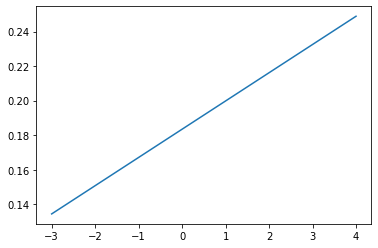

In [27]:
# Linear Model

mymodel = np.poly1d(np.polyfit(x_array, y_array, 1))
plt.plot(myline, mymodel(myline))

# r^2 score for linear model
print(r2_score(y_array, mymodel(x_array)))

0.0020011024901827046


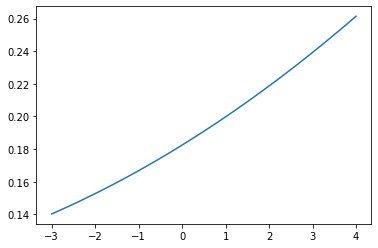

In [28]:
# Polynominal - Degree 2

mymodel_2 = np.poly1d(np.polyfit(x_array, y_array, 2))
plt.plot(myline, mymodel_2(myline))

print(r2_score(y_array, mymodel_2(x_array)))

0.0023251395438159683


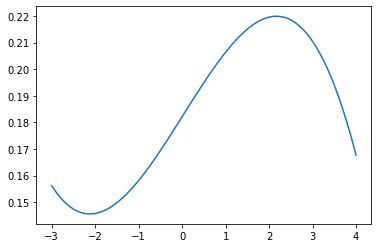

In [29]:
# Polynominal - Degree 3

mymodel_3 = np.poly1d(np.polyfit(x_array, y_array, 3))
plt.plot(myline, mymodel_3(myline))

print(r2_score(y_array, mymodel_3(x_array)))

0.0023928732613467396


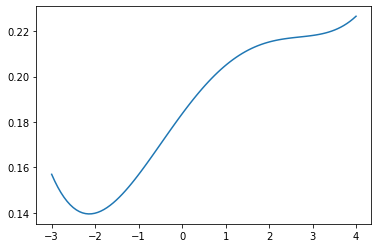

In [30]:
# Polynominal - Degree 4

mymodel_4 = np.poly1d(np.polyfit(x_array, y_array, 4))
plt.plot(myline, mymodel_4(myline))

print(r2_score(y_array, mymodel_4(x_array)))

0.0028700115591492326


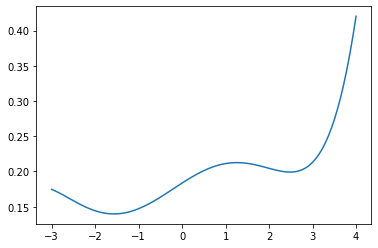

In [31]:
# Polynominal - Degree 5

mymodel_5 = np.poly1d(np.polyfit(x_array, y_array, 5))
plt.plot(myline, mymodel_5(myline))

print(r2_score(y_array, mymodel_5(x_array)))

0.002878702692930335


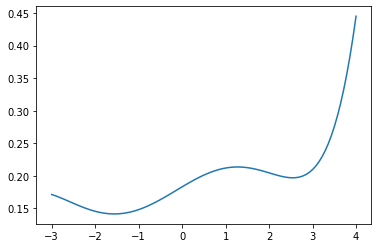

In [32]:
# Polynominal - Degree 6

mymodel_6 = np.poly1d(np.polyfit(x_array, y_array, 6))
plt.plot(myline, mymodel_6(myline))

print(r2_score(y_array, mymodel_6(x_array)))

0.0029667507789638004


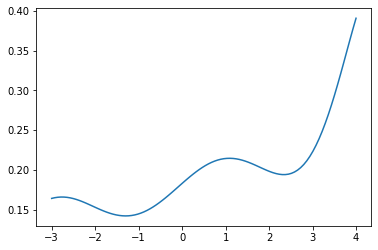

In [33]:
# Polynominal - Degree 7

mymodel_7 = np.poly1d(np.polyfit(x_array, y_array, 7))
plt.plot(myline, mymodel_7(myline))

print(r2_score(y_array, mymodel_7(x_array)))

0.002967236868801848


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


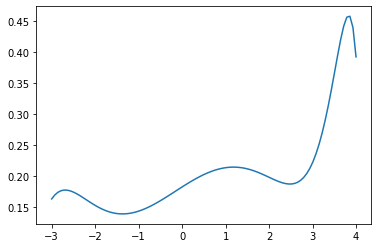

In [34]:
# Polynominal - Degree 20

mymodel_20 = np.poly1d(np.polyfit(x_array, y_array, 20))
plt.plot(myline, mymodel_20(myline))

print(r2_score(y_array, mymodel_20(x_array)))

Linear Relation between Tweet and Environment

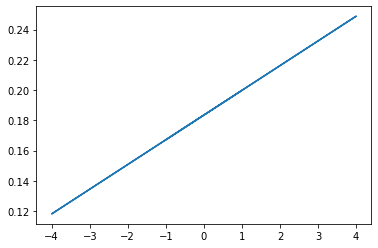

In [35]:
m, b = np.polyfit(x_array, y_array, 1)
plt.plot(x_array, m*x_array + b)

In [36]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(x_array, y_array)
print(r)

0.04452304014723474


Linear Relation between Tweet and Environment

In [37]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(y_array, x_array)
print(r)

0.04452304014723413
